<a href="https://colab.research.google.com/github/Archangel212/seoul-bike-sharing-demand-prediction/blob/master/ProyekPertama_Predictive_Analiytic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Michael David Baskoro Krisnanto

Dataset ini diambil dari : https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv



In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [69]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv',
                          encoding='unicode_escape', names=['date', 'rented_bike_count', 'hour', 
                                                              'temperature', 'humidity', 'wind_speed',
                                                              'visibility', 'dew_point_temperature', 'solar_radiation',
                                                              'rainfall', 'snowfall', 'seasons',
                                                              'holiday', 'functioning_day'], header=0)
df

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


# Data Understanding 

In [70]:
df.info()
#satuan dari temperature (derajat celcius)
#satuan dari humidity (percent)
#satuan dari wind_speed (m/s)
#satuan dari visibility (10meter)
#satuan dari dew_point_temperature (derajat celcius)
#satuan dari solar radiation (MJ/m^2)
#satuan dari rainfall (milimeter)
#satuan dari snowfall (milimeter)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   8760 non-null   object 
 1   rented_bike_count      8760 non-null   int64  
 2   hour                   8760 non-null   int64  
 3   temperature            8760 non-null   float64
 4   humidity               8760 non-null   int64  
 5   wind_speed             8760 non-null   float64
 6   visibility             8760 non-null   int64  
 7   dew_point_temperature  8760 non-null   float64
 8   solar_radiation        8760 non-null   float64
 9   rainfall               8760 non-null   float64
 10  snowfall               8760 non-null   float64
 11  seasons                8760 non-null   object 
 12  holiday                8760 non-null   object 
 13  functioning_day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

Data 365 hari dari tanggal 2017-12-01 pada baris pertama dan tanggal 2018-11-30 pada baris terakhir. (2017-12-01 sampai 2017-12-02 dihitung 2 baris)

In [71]:
start_date = pd.to_datetime(df.at[0, 'date'], dayfirst=True)
end_date = pd.to_datetime(df.at[len(df) - 1, 'date'], dayfirst=True)

print('start_date =', start_date.date(), '\t end_date =', end_date.date())

start_date = 2017-12-01 	 end_date = 2018-11-30


Tidak terdapat missing values ataupun duplikat

In [72]:
print(df.isnull().values.any(), '\n')
print('na rows \n',df.isna().sum(), '\n')
print('duplicated rows \n', df[df.duplicated()].sum(), '\n')

#====== Mencari Missing Dates ====================
#membuat dataframe berisi tanggal-tanggal, tanggal mulai dari start_date dan berakhir sampai end_date
dates = pd.date_range(start=start_date, end=end_date, freq='D')
dates_df = pd.DataFrame(dates, columns=['date'])

#date_feature berisi tanggal - tanggal unik dari dataframe df['date']
date_feature = df['date'].unique()
date_feature_df = pd.DataFrame(pd.to_datetime(date_feature, dayfirst=True), columns=['date'])

#comparasi kedua dataframe 
print('missing dates', dates_df.compare(date_feature_df))

False 

na rows 
 date                     0
rented_bike_count        0
hour                     0
temperature              0
humidity                 0
wind_speed               0
visibility               0
dew_point_temperature    0
solar_radiation          0
rainfall                 0
snowfall                 0
seasons                  0
holiday                  0
functioning_day          0
dtype: int64 

duplicated rows 
 date                     0.0
rented_bike_count        0.0
hour                     0.0
temperature              0.0
humidity                 0.0
wind_speed               0.0
visibility               0.0
dew_point_temperature    0.0
solar_radiation          0.0
rainfall                 0.0
snowfall                 0.0
seasons                  0.0
holiday                  0.0
functioning_day          0.0
dtype: float64 

missing dates Empty DataFrame
Columns: []
Index: []


setiap tanggalnya terdapat 24 jam

In [73]:
df.groupby('date')['hour'].size()

date
01/01/2018    24
01/02/2018    24
01/03/2018    24
01/04/2018    24
01/05/2018    24
              ..
31/05/2018    24
31/07/2018    24
31/08/2018    24
31/10/2018    24
31/12/2017    24
Name: hour, Length: 365, dtype: int64

Beberapa hal yang dapat diambil dari nilai mean, std, min, Q1, Q2, Q3 dan max pada setiap fitur:


1.   Penggunaan bike sharing di Seoul bervariasi ditandai dengan mean 704 dan std 644

3. Rata-rata suhu pada saat data diambil adalah 12.882922 derajat Celsius, dan memiliki standar deviasi yang cukup tinggi, yaitu 11.944825. Hal ini menunjukkan variasi suhu yang cukup tinggi di Seoul, yang dapat mempengaruhi keputusan orang untuk menggunakan sepeda sharing.
4. Rata-rata curah hujan adalah 0.148687mm berarti sebagian besar curah hujan yang minim sedangkan Q1, Q2, Q3 adalah 0mm dan min 0.0 mm serta max 35.0mm menunjukkan sebagian besar data 



In [74]:
print(df.describe())

       rented_bike_count         hour  temperature     humidity   wind_speed  \
count        8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean          704.602055    11.500000    12.882922    58.226256     1.724909   
std           644.997468     6.922582    11.944825    20.362413     1.036300   
min             0.000000     0.000000   -17.800000     0.000000     0.000000   
25%           191.000000     5.750000     3.500000    42.000000     0.900000   
50%           504.500000    11.500000    13.700000    57.000000     1.500000   
75%          1065.250000    17.250000    22.500000    74.000000     2.300000   
max          3556.000000    23.000000    39.400000    98.000000     7.400000   

        visibility  dew_point_temperature  solar_radiation     rainfall  \
count  8760.000000            8760.000000      8760.000000  8760.000000   
mean   1436.825799               4.073813         0.569111     0.148687   
std     608.298712              13.060369         0.86

# Univariate Analysis
### **Analisis sebaran pada setiap fitur numerik**


Histogram fitur dibawah menunjukkan:
1.   Mayoritas rented_bike_count terpusat pada rentang 0 - 500 dengan penurunan tajam dalam frekuensi untuk nilai yang lebih tinggi. Ini mengindikasikan bahwa sebagian besar penyewaan sepeda untuk jarak atau durasi yang pendek.


2.   Temperature memiliki persebaran yang cukup merata

3.  Visibility memiliki left-skewed distribution

4. Solar Radiation, Rainfall, dan Snowfall memiliki right-skewed distribution



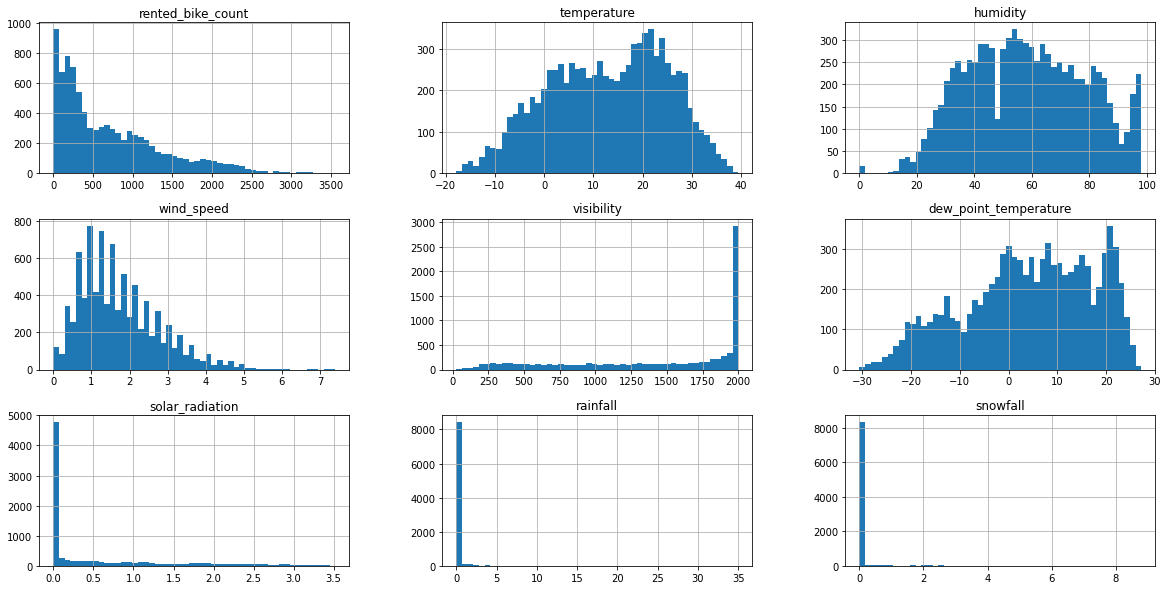

In [75]:
categorical_features = ['date', 'hour', 'seasons', 'holiday', 'functioning_day']
numerical_features = ['rented_bike_count', 'temperature', 'humidity', 
                      'wind_speed', 'visibility', 'dew_point_temperature',
                      'solar_radiation', 'rainfall', 'snowfall']
                      
df[numerical_features].hist(bins=50, figsize=(20,10))
plt.show()

### **Analisis jumlah nilai unique pada setiap fitur kategorik**

    jumlah sampel  percentage
0             365    4.166667
1             365    4.166667
2             365    4.166667
3             365    4.166667
4             365    4.166667
5             365    4.166667
6             365    4.166667
7             365    4.166667
8             365    4.166667
9             365    4.166667
10            365    4.166667
11            365    4.166667
12            365    4.166667
13            365    4.166667
14            365    4.166667
15            365    4.166667
16            365    4.166667
17            365    4.166667
18            365    4.166667
19            365    4.166667
20            365    4.166667
21            365    4.166667
22            365    4.166667
23            365    4.166667 

        jumlah sampel  percentage
Winter           2160   24.657534
Spring           2208   25.205479
Summer           2208   25.205479
Autumn           2184   24.931507 

            jumlah sampel  percentage
No Holiday           8328   95.068493


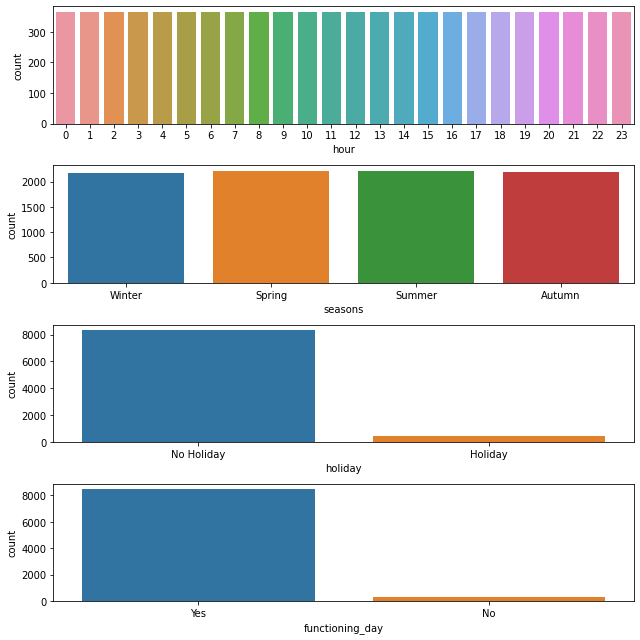

In [76]:
fig = plt.figure(figsize=(9,9))
for i, categorical_feature in enumerate(categorical_features[1:]):
  ax = fig.add_subplot(4,1, i + 1)

  sample_counts = df[categorical_feature].value_counts()[df[categorical_feature].unique()]
  percentage = 100 * df[categorical_feature].value_counts(normalize=True)[df[categorical_feature].unique()]
  percentage_df = pd.DataFrame({'jumlah sampel': sample_counts, 'percentage': percentage})

  print(percentage_df, '\n')
  sns.countplot(x=categorical_feature, data=df, ax=ax)

fig.tight_layout()
plt.show()

### **Mendeteksi dan Menghapus Outlier**

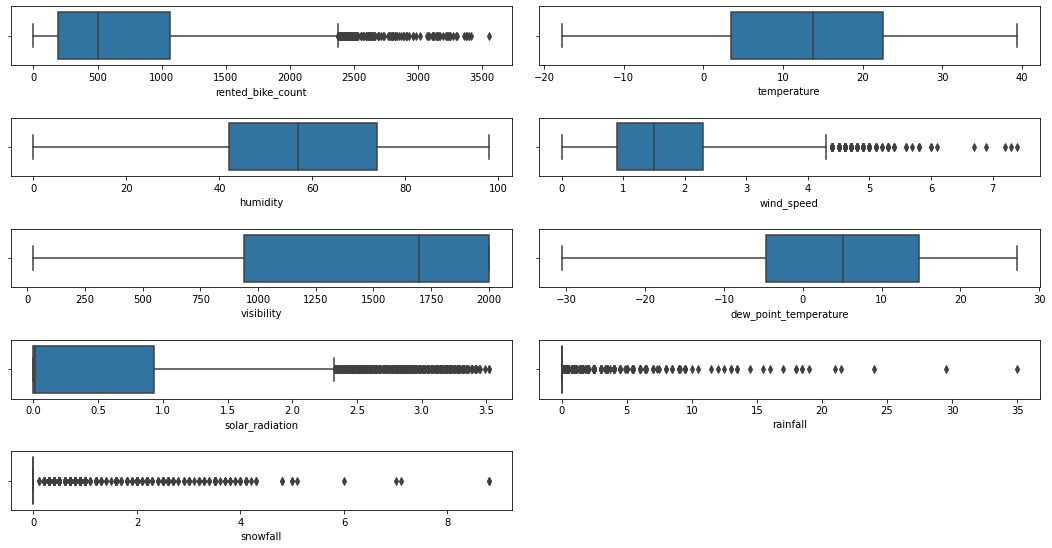

In [77]:
#melihat apakah terdapat outlier pada setiap numerical features
def boxplotting_numerical_features():
  row, col = 5,2
  figure = plt.figure(figsize=(3*row, 4*col))
  for i, numerical_feature in enumerate(numerical_features):
    ax = figure.add_subplot(row, col, i + 1)
    sns.boxplot(x=df[numerical_feature], ax=ax)
  figure.tight_layout(pad=2.08)
  plt.plot()
  
boxplotting_numerical_features()

#### Menghilangkan outliers menggunakan IQR pada fitur numerik kecuali pada fitur rainfall dan snowfall karena jika dilakukan maka setiap nilai pada fitur tersebut menjadi 0.0

#### fitur rainfall dan snowfall bersama fitur numerik lainya akan dilakukan transformasi menggunakan QuantileTransformer di tahap preprocessing

<ipython-input-78-71945a0e52d8>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df.loc[:, ~df.columns.isin(['rainfall', 'snowfall'])] = df1[~((df1 < (Q1 - 1.5*IQR)) | (df1 > (Q3 + 1.5*IQR))).any(axis=1)]


7832

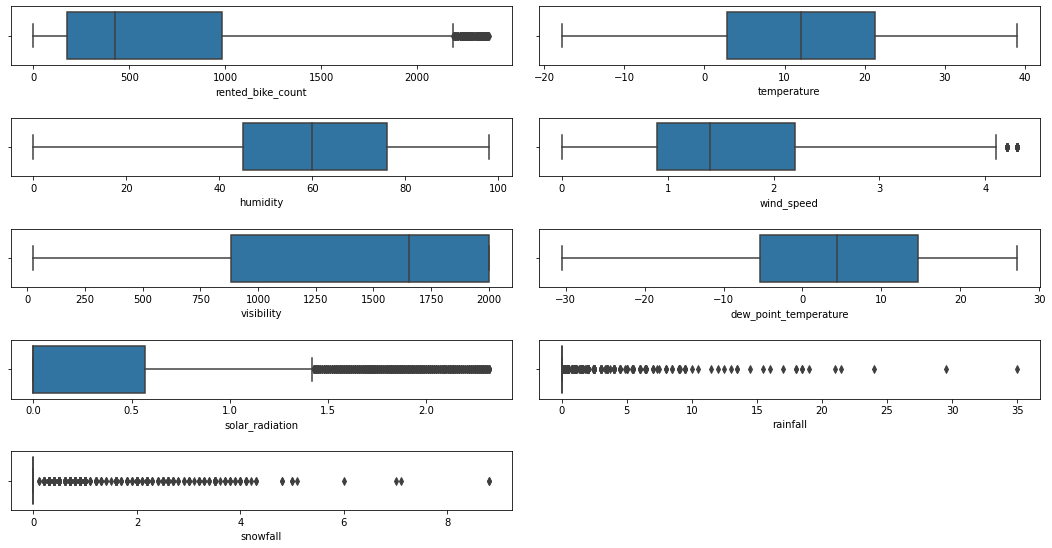

In [78]:
df1 = df.drop(labels=['rainfall', 'snowfall'], axis=1)
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
df.loc[:, ~df.columns.isin(['rainfall', 'snowfall'])] = df1[~((df1 < (Q1 - 1.5*IQR)) | (df1 > (Q3 + 1.5*IQR))).any(axis=1)]
df = df.dropna()

#IQR pada setiap fitur termasuk rainfall dan snowfall
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1
# df = df[~((df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR))).any(axis=1)]

boxplotting_numerical_features()
len(df)

# Multivariate Analysis

rented_bike_count relatif terhadap fitur hour, seasons, holiday, dan functioning_day menggambarkan:


1.   Jam 8 pagi dan jam 17 sore merupakan jam dimana jumlah rented_bike_count memuncak jika dibandingkan dengan jam - jam sebelumnya.
2.   Musim Panas merupakan musim dimana paling banyak terjadi peminjaman sepeda diikuti musim gugur lalu musim semi.

3. Peminjaman sepeda pada hari kerja lebih banyak jika dibandingkan dengan hari libur. 

4. peminjaman sepada hanya terjadi pada functional_day



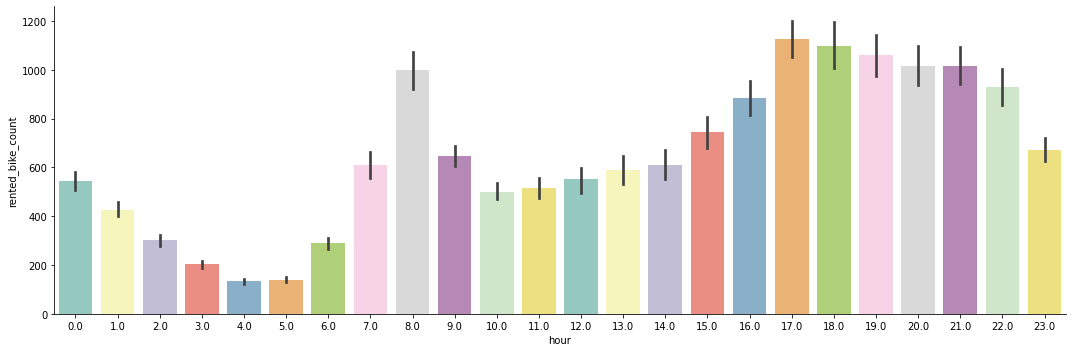

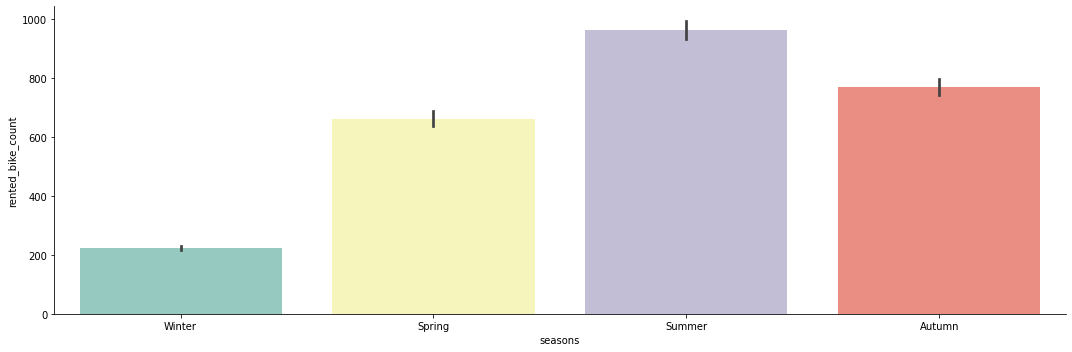

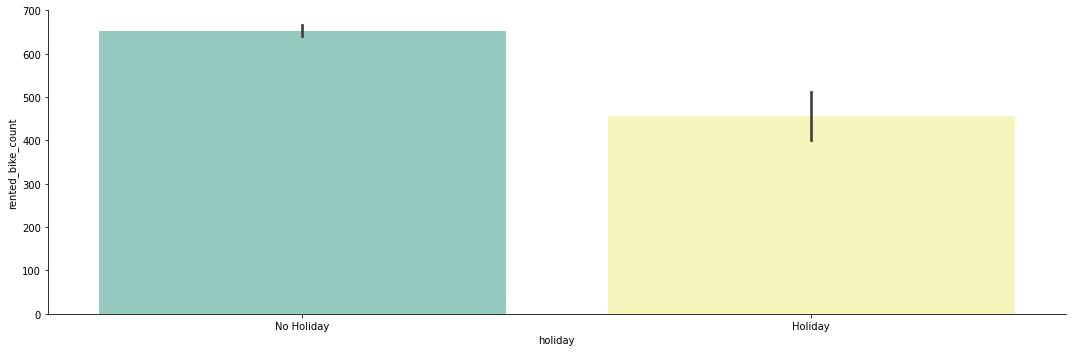

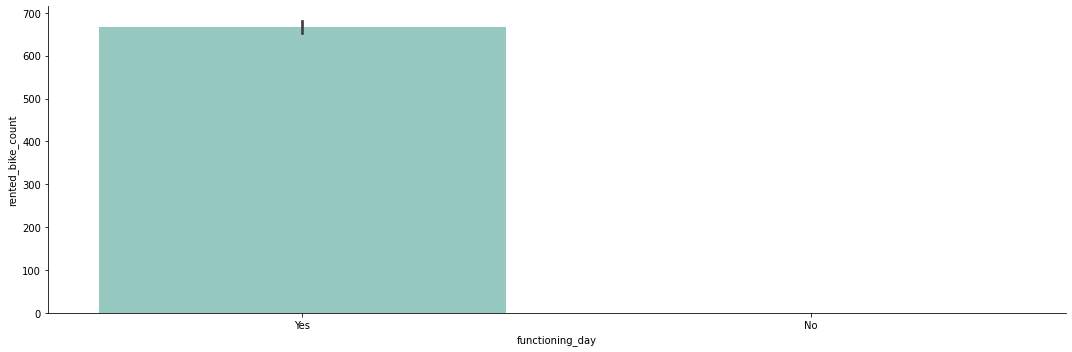

In [79]:
for col in categorical_features[1:]:
  sns.catplot(x=col, y='rented_bike_count', data=df, kind='bar', dodge=False, aspect=3, palette='Set3')

Menghapus baris yang mengandung functioning_day == 'No' dan fitur functioning_day karena jika dilihat dari categorical plot sebelumnya fitur rented_bike_count miliki nilai functioning_day == 'Yes' yang besar dan functioning_day == 'No' miliki nilai 0.

In [80]:
functioning_day_no_rows = df[df['functioning_day'] == 'No']
print('jumlah baris functioning_day == No yang dihapus', len(functioning_day_no_rows))
df = df.drop(functioning_day_no_rows.index)
df = df.drop(labels='functioning_day', axis=1)

jumlah baris functioning_day == No yang dihapus 271


dari pairplot dibawah dapat disimpulkan bahwa temperature dan dew_point_temperature memiliki korelasi positif terhadap rented_bike_count, juga antara temperature dan dew_point_temperature memiliki korelasi positif.

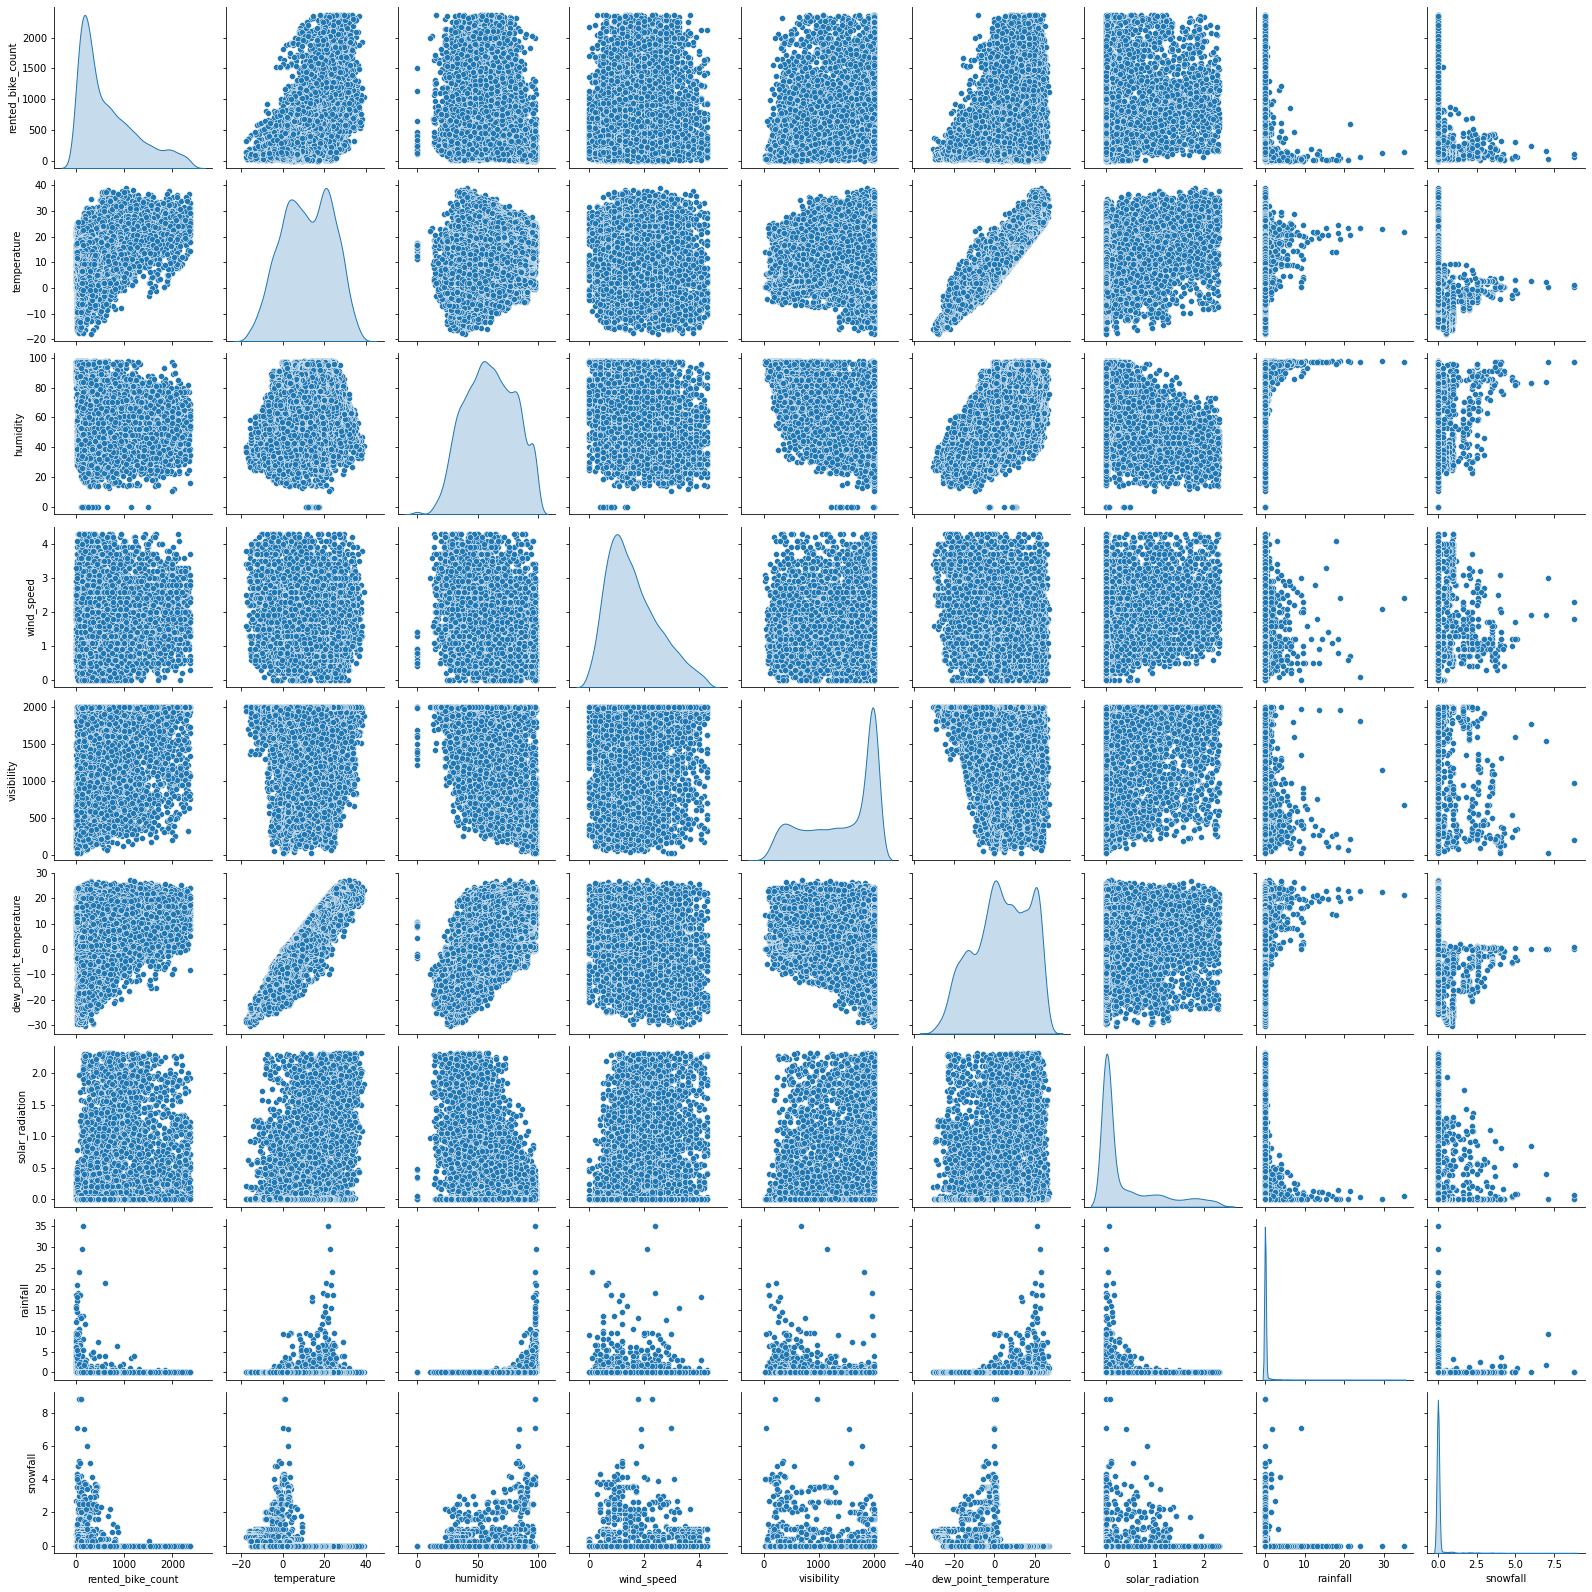

In [81]:
sns.pairplot(df[numerical_features], diag_kind='kde')

#### korelasi matrix dibawah menunjukkan korelasi positif humidity dan dew_point_temperature memiliki nilai 0.59 yang cukup besar jika dibandingkan dengan lainnya.
#### fitur dew_point_temperature akan dibuang karena terkorelasi sangat besar dengan fitur temparture yang menyebabkan multicolinearity

<AxesSubplot:>

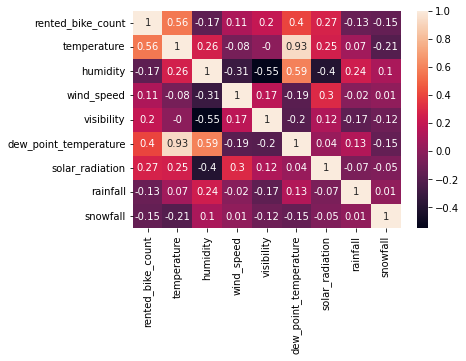

In [82]:
corr_matrix = df[numerical_features].corr().round(2)

# Melihat kolerasi antara fitur numerik dengan fitur target (rented_bike_count)
sns.heatmap(data=corr_matrix, annot=True)

fiture date dipecah menjadi fitur year, month and day pada code cell dibawah, dimana:


1.   Terjadi kenaikan pada peminjaman mulai bulan 2 sampai bulan 7 pada puncaknya dan mengalami penurunan mulai bulan 10 sampai 12
2.   Jika melihat fitur daily,  peminjaman pada hari kerja lebih signifikan



[]

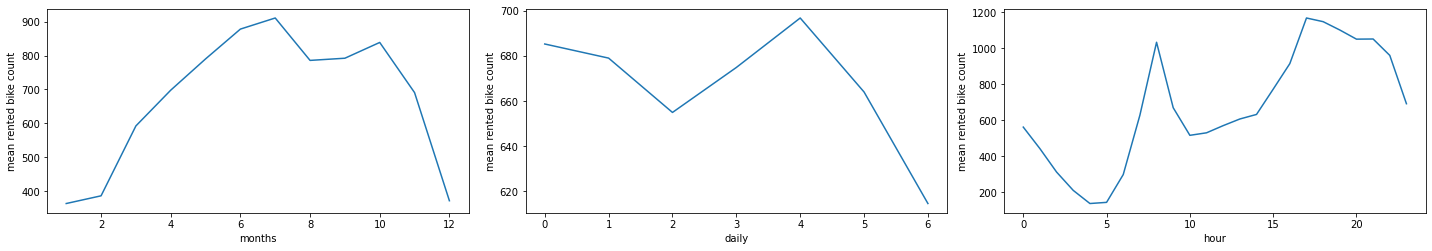

In [83]:
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

adf = df.copy()
adf['months'] = pd.to_datetime(adf['date']).dt.month
adf['day'] = pd.to_datetime(adf['date']).dt.dayofweek

monthly_rent = adf.groupby('months')['rented_bike_count'].mean()
daily_rent = adf.groupby('day')['rented_bike_count'].mean()
hourly_rent = adf.groupby('hour')['rented_bike_count'].mean()

figure = plt.figure(figsize=(20,10))

ax1 = figure.add_subplot(3,3, 1)
plt.plot(monthly_rent)
plt.xlabel('months')
plt.ylabel('mean rented bike count')

ax2 = figure.add_subplot(3,3, 2)
plt.plot(daily_rent)
plt.xlabel('daily')
plt.ylabel('mean rented bike count')

ax3 = figure.add_subplot(3,3, 3)
plt.plot(hourly_rent)
plt.xlabel('hour')
plt.ylabel('mean rented bike count')

figure.tight_layout()
plt.plot()

# Modeling

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#fitur yang dibuang adalah 'date', 'dew_point_temperature', 'rainfall', 'snowfall'
dataset = df.drop(labels=['date', 'dew_point_temperature'], axis=1)
dataset = pd.get_dummies(dataset, columns=['holiday', 'seasons','hour', 'day', 'month', 'year'])

dataset_train, dataset_test = train_test_split(dataset, test_size=0.2, random_state=123)
num_features = list(filter(lambda x: x not in ['dew_point_temperature'], numerical_features))
print(num_features)


['rented_bike_count', 'temperature', 'humidity', 'wind_speed', 'visibility', 'solar_radiation', 'rainfall', 'snowfall']


#### Membuat distribusi setiap fitur numerik menjadi uniform distribution karena fitur - fitur numerik memiliki distribusi yang skewed ke kanan dan kiri. Jika output_distribution nya uniform maka menghasilkan akurasi 0.89 pada RandomForestRegressor sedangkan jika output_distribution nya normal menghasilkan akurasi 0.86 pada model yang sama.
#### Lalu dilakukan normalisasi mean 0 dan std 1

In [85]:

from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='uniform')
scaler = StandardScaler()

#===============================
dataset_train[num_features] = qt.fit_transform(dataset_train[num_features])
dataset_train[num_features] = scaler.fit_transform(dataset_train[num_features])

X_train = dataset_train.loc[:, ~dataset_train.columns.isin(['rented_bike_count'])]
y_train = dataset_train['rented_bike_count']

#===============================

dataset_test[num_features] = qt.transform(dataset_test[num_features])
dataset_test[num_features] = scaler.transform(dataset_test[num_features])

X_test = dataset_test.loc[:, ~dataset_test.columns.isin(['rented_bike_count'])]
y_test = dataset_test['rented_bike_count']


#===============================
df_train = pd.DataFrame(data=X_train, columns=X_train.columns)
df_test = pd.DataFrame(data=X_test, columns=X_test.columns)

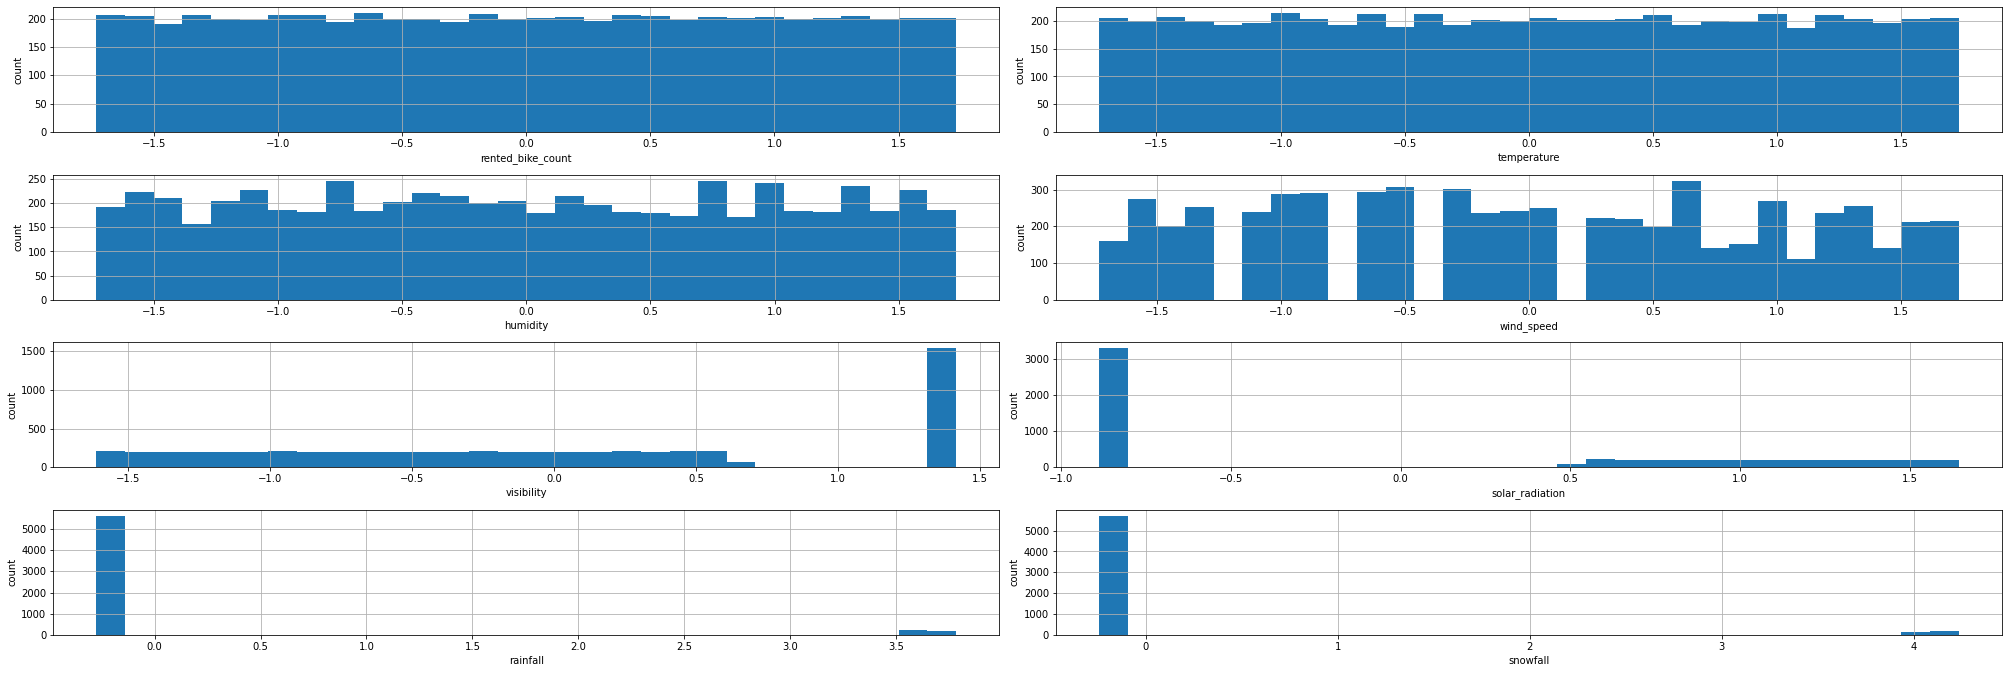

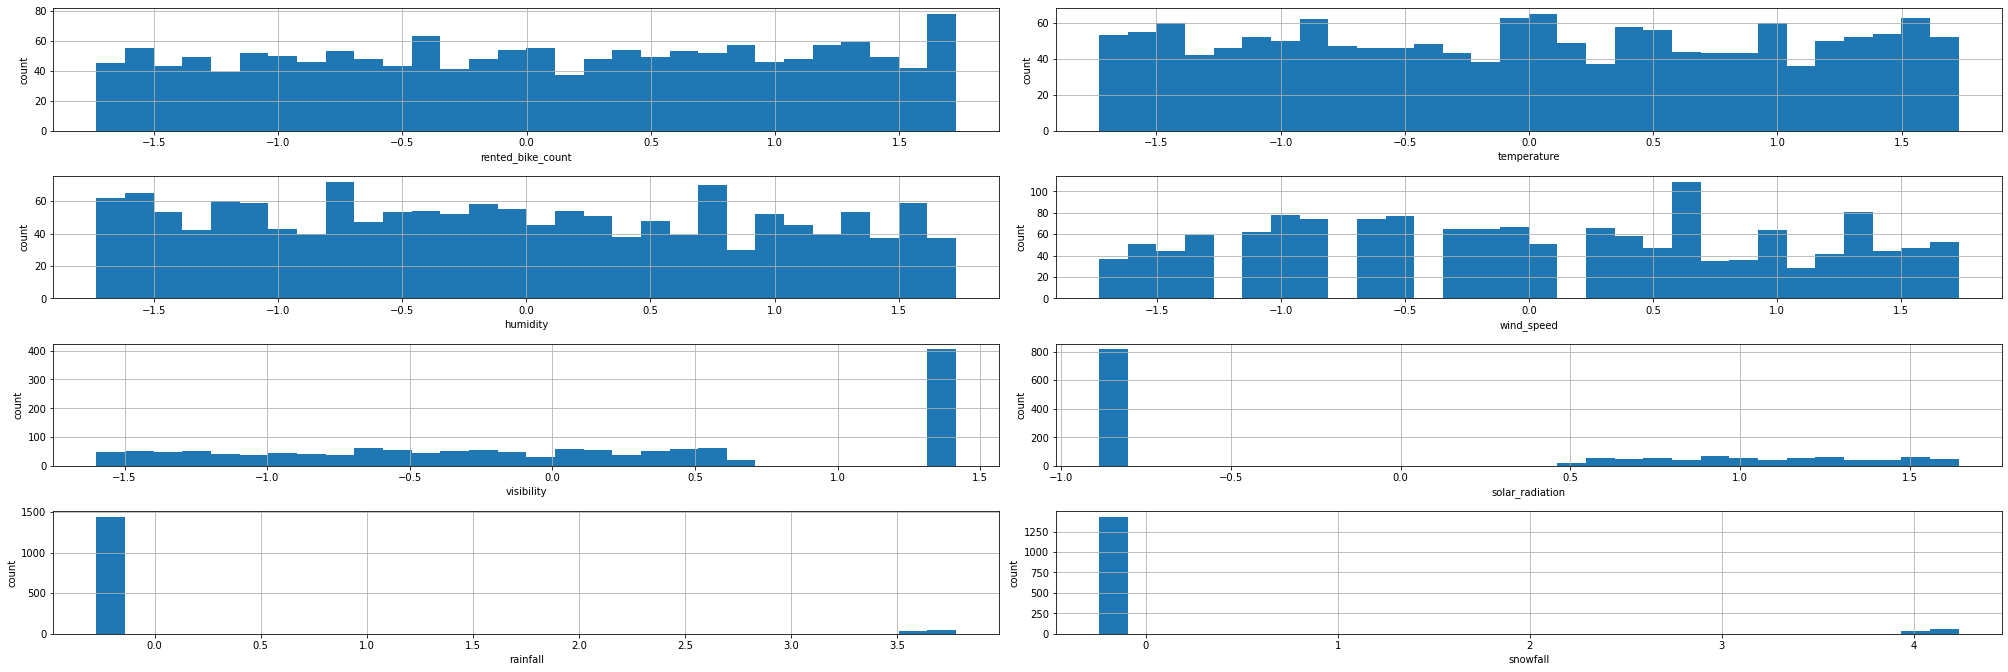

In [86]:
def hist_plot_multiple_variables(df, variables, rowcol):
    row, col = rowcol
    figure = plt.figure(figsize=(4*row, 8*col))
    for i,v in enumerate(variables):
        ax = figure.add_subplot(row, col, i+1)
        df[v].hist(bins=30, ax=ax)
        plt.xlabel(v)
        plt.ylabel('count')
    figure.tight_layout()
    plt.show()

# tampilkan distribusi dari data latih dan test setelah dilakukan transformasi Quantile dan normalisai 
d = pd.concat([y_train, X_train], axis=1)
hist_plot_multiple_variables(d, num_features, (7,2))

d = pd.concat([y_test, X_test], axis=1)
hist_plot_multiple_variables(d, num_features, (7,2))


# Evaluasi

---



Dari hasil Mean Squared Error dan r2 score didapat bahwa Model RandomForestRegressor yang tertinggi dan KNN yang terendah

In [87]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_mse = mean_squared_error(y_test, y_pred)
print('knn', knn_mse)
print('knn_r2_score', knn.score(X_test, y_test))

rf = RandomForestRegressor(n_estimators=200, random_state=123)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred)
print('rf_mse', rf_mse)
print('rf_r2_score', rf.score(X_test, y_test))

gb = GradientBoostingRegressor(learning_rate=0.6, n_estimators=250, random_state=123)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
gb_mse = mean_squared_error(y_test, y_pred)
print('gb_mse', gb_mse)
print('gb_r2_score', gb.score(X_test, y_test))


knn 0.21149131826382864
knn_r2_score 0.791616534943286
rf_mse 0.10752884386811706
rf_r2_score 0.8940512865363659
gb_mse 0.11359216792126041
gb_r2_score 0.8880770626943283
